In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [2]:
importaciones = pd.read_excel('./data2/IMPORTACION-VOLUMEN-2023-05.xlsx', skiprows=6)
consumo = pd.read_excel('./data2/CONSUMO-2023-05.xlsx', skiprows=6)
precios_2023 = pd.read_excel('./data2/Precios-Promedio-Nacionales-Diarios-2023.xlsx', sheet_name=0, skiprows=7)
precios_2022 = pd.read_excel('./data2/Precios-Promedio-Nacionales-Diarios-2023.xlsx', sheet_name=1, skiprows=6)
precios_2021 = pd.read_excel('./data2/Precios-Promedio-Nacionales-Diarios-2023.xlsx', sheet_name=2, skiprows=6)


In [3]:
print("importaciones")
print(importaciones.columns)
print("consumo")
print(consumo.columns)
print("precios 2023")
print(precios_2023.columns)
print("precios 2022")
print(precios_2022.columns)
print("precios 2021")
print(precios_2021.columns)

importaciones
Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación'],
      dtype='object')
consumo
Index(['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas',
       'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'Orimulsión', 'Total'],
      dtype='object')
p

In [4]:
importaciones.rename(columns={'Gasolina superior': 'Superior','Gasolina regular': 'Regular'}, inplace=True)
consumo.rename(columns={'Gasolina superior': 'Superior','Gasolina regular': 'Regular'}, inplace=True)



In [5]:
Seleccion=['Fecha', 'Superior', 'Regular', 'Diesel alto azufre']
SinFecha=['Gasolina superior', 'Gasolina regular', 'Diesel alto azufre']
consumas = consumo[Seleccion]
importas = importaciones[Seleccion]


# a partir de la linea 288 para consumo ya no se toma en relevancia
# para importaciones 276
consumo = consumo[:288]
importaciones = importaciones[:276]
consumas = consumas[:270]
importas = importas[:270]

In [6]:
# Obtener los valores de la fila 0 (nombres de columna alternativos)
nombres_columnas_fila_0 = precios_2023.iloc[0]

# Crear nuevos nombres de columna combinando los nombres actuales con los de la fila 0
nuevos_nombres_columnas = [f"{nombre_actual} ({nombre_fila_0})"
                            if isinstance(nombre_fila_0, str) else nombre_actual
                            for nombre_actual, nombre_fila_0 in zip(precios_2023.columns, nombres_columnas_fila_0)]

# Asignar los nuevos nombres de columna al DataFrame (omitir la primera fila)
precios_2023.columns = nuevos_nombres_columnas
precios_2023 = precios_2023[1:].reset_index(drop=True)

# Cambiando el nombre de la ultima columna
precios_2023.rename(columns={'Unnamed: 7 (GTQ/LB)': 'Glp Cilindro 25Lbs. 7 (GTQ/LB)'}, inplace=True)

# a partir de la linea 227 para consumo ya no se toma en relevancia
#precios_2023 = precios_2023[:223]

# Eliminar la fila de la fuente (última fila en este caso)
precios_2023 = precios_2023.drop(precios_2023.index[-1])
precios_2023 = precios_2023.drop(precios_2023.index[-1])

#precios_2023 = precios_2023[:270]


In [7]:
# Obtener los valores de la fila 0 (nombres de columna alternativos)
nombres_columnas_fila_0 = precios_2022.iloc[0]

# Crear nuevos nombres de columna combinando los nombres actuales con los de la fila 0
nuevos_nombres_columnas = [f"{nombre_actual} ({nombre_fila_0})"
                            if isinstance(nombre_fila_0, str) else nombre_actual
                            for nombre_actual, nombre_fila_0 in zip(precios_2022.columns, nombres_columnas_fila_0)]

# Asignar los nuevos nombres de columna al DataFrame (omitir la primera fila)
precios_2022.columns = nuevos_nombres_columnas
precios_2022 = precios_2022[1:].reset_index(drop=True)

# Cambiando el nombre de la ultima columna
precios_2022.rename(columns={'Unnamed: 7 (GTQ/LB)': 'Glp Cilindro 25Lbs. 7 (GTQ/LB)'}, inplace=True)

# a partir de la linea 373 para consumo ya no se toma en relevancia
#precios_2022 = precios_2022[:373]

# Eliminar la fila de la fuente (última fila en este caso)
precios_2022 = precios_2022.drop(precios_2022.index[-1])
precios_2022 = precios_2022.drop(precios_2022.index[-1])

In [8]:
# Obtener los valores de la fila 0 (nombres de columna alternativos)
nombres_columnas_fila_0 = precios_2021.iloc[0]

# Crear nuevos nombres de columna combinando los nombres actuales con los de la fila 0
nuevos_nombres_columnas = [f"{nombre_actual} ({nombre_fila_0})"
                            if isinstance(nombre_fila_0, str) else nombre_actual
                            for nombre_actual, nombre_fila_0 in zip(precios_2021.columns, nombres_columnas_fila_0)]

# Asignar los nuevos nombres de columna al DataFrame (omitir la primera fila)
precios_2021.columns = nuevos_nombres_columnas
precios_2021 = precios_2021[1:].reset_index(drop=True)

# Cambiando el nombre de la ultima columna
precios_2021.rename(columns={'Unnamed: 7 (GTQ/LB)': 'Glp Cilindro 25Lbs. 7 (GTQ/LB)'}, inplace=True)

# a partir de la linea 373 para consumo ya no se toma en relevancia
#precios_2021 = precios_2021[:373]

# Eliminar la fila de la fuente (última fila en este caso)
precios_2021 = precios_2021.drop(precios_2021.index[-1])
precios_2021 = precios_2021.drop(precios_2021.index[-1])

In [9]:

# Uniendo las 3 hojas
precios = pd.concat([precios_2023, precios_2022, precios_2021], ignore_index=True)

precios.rename(columns={'FECHA': 'Fecha','Superior (GTQ/GALON)': 'Superior','Regular (GTQ/GALON)': 'Regular','Diesel (GTQ/GALON)': 'Diesel'}, inplace=True)
precios.columns
columnas_seleccion = ['Fecha', 'Superior',
                      'Regular', 'Diesel']
preciosas = precios[columnas_seleccion]


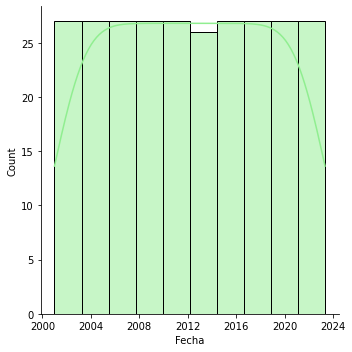

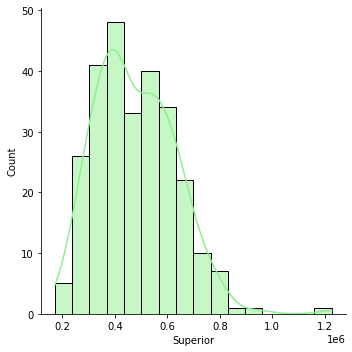

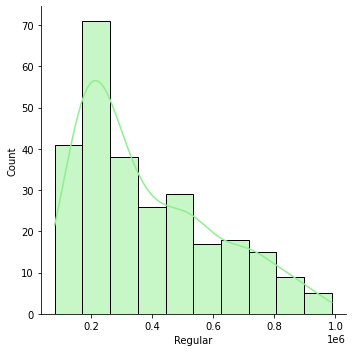

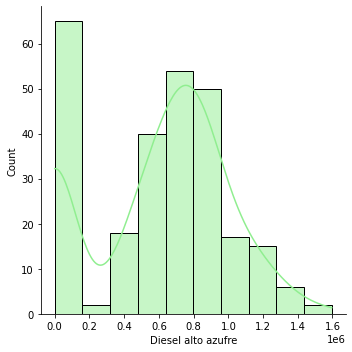

In [10]:
for var in Seleccion:
    sns.displot(importas[var], kde=True, color = 'lightgreen')